In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import seaborn as sb
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.pipeline import make_pipeline

In [12]:
iris=load_iris()
data=pd.DataFrame(data=iris.data,columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
X=data[["petal length (cm)","petal width (cm)"]]
y=iris.target
print(X)
print(y)

     petal length (cm)  petal width (cm)
0                  1.4               0.2
1                  1.4               0.2
2                  1.3               0.2
3                  1.5               0.2
4                  1.4               0.2
..                 ...               ...
145                5.2               2.3
146                5.0               1.9
147                5.2               2.0
148                5.4               2.3
149                5.1               1.8

[150 rows x 2 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [14]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=109)
print(train_X)
print(test_X)
print(train_y)
print(test_y)

     petal length (cm)  petal width (cm)
90                 4.4               1.2
109                6.1               2.5
73                 4.7               1.2
148                5.4               2.3
126                4.8               1.8
..                 ...               ...
33                 1.4               0.2
75                 4.4               1.4
143                5.9               2.3
141                5.1               2.3
6                  1.4               0.3

[120 rows x 2 columns]
     petal length (cm)  petal width (cm)
147                5.2               2.0
66                 4.5               1.5
138                4.8               1.8
1                  1.4               0.2
145                5.2               2.3
81                 3.7               1.0
47                 1.4               0.2
123                4.9               1.8
54                 4.6               1.5
136                5.6               2.4
128                5.6           

In [17]:
svm_clf=make_pipeline(StandardScaler(),LinearSVC(C=2,random_state=42))
svm_clf.fit(train_X,train_y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=2, random_state=42))])

In [28]:
y_pred_test=svm_clf.predict(test_X)
print(y_pred_test)
y_pred=svm_clf.predict(train_X)

[2 1 2 0 2 1 0 2 1 2 2 0 1 0 0 0 1 2 0 1 2 0 2 0 0 2 1 1 1 2]


In [29]:
cm=confusion_matrix(test_y,y_pred_test)
print(cm)
print(classification_report(test_y,y_pred_test))

[[10  0  0]
 [ 0  8  2]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.80      0.84        10
           2       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



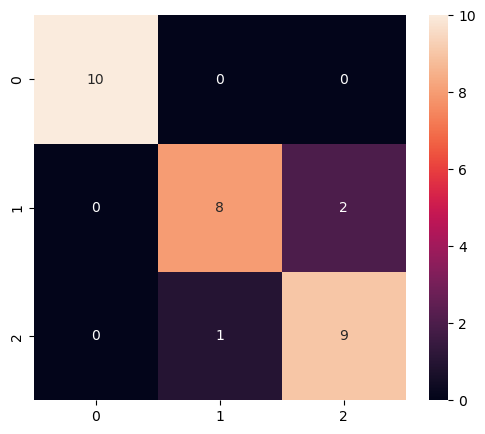

In [34]:
fig,ax=plt.subplots(figsize=(6,5))
sb.heatmap(cm,annot=True,ax=ax)
plt.show()

In [35]:
print(accuracy_score(train_y,y_pred))

0.975


In [41]:
from sklearn import metrics
disp = metrics.ConfusionMatrixDisplay.from_predictions(test_y, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

NameError: name 'y_test' is not defined